In [64]:
import numpy as np 
import pandas as pd 
import matplotlib
import seaborn as sns 
from matplotlib import pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer


In [2]:
data = pd.read_csv("Datasets/hypothyroid.csv")
df = data 

In [3]:
df.shape 

(3772, 30)

<Axes: >

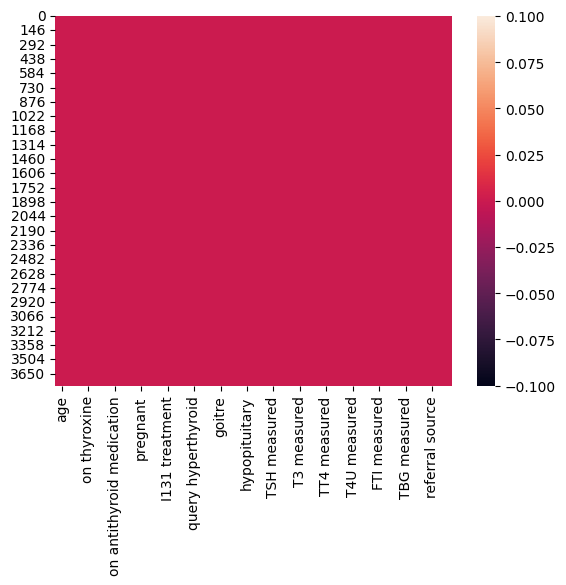

In [5]:
sns.heatmap(df.isna())

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [10]:
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P


In [11]:
df.columns 

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'binaryClass'],
      dtype='object')

In [ ]:
df.nunique()

age                           94
sex                            3
on thyroxine                   2
query on thyroxine             2
on antithyroid medication      2
sick                           2
pregnant                       2
thyroid surgery                2
I131 treatment                 2
query hypothyroid              2
query hyperthyroid             2
lithium                        2
goitre                         2
tumor                          2
hypopituitary                  2
psych                          2
TSH measured                   2
TSH                          288
T3 measured                    2
T3                            70
TT4 measured                   2
TT4                          242
T4U measured                   2
T4U                          147
FTI measured                   2
FTI                          235
TBG measured                   1
TBG                            1
referral source                5
binaryClass                    2
dtype: int

In [34]:
df["binaryClass"]= df["binaryClass"].map({"P":1 , "N":0})

In [36]:
df= df.replace({"f":0, "t":1})

In [37]:
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,0,0,0,0,0,0,0,0,...,1,125,1,1.14,1,109,0,?,SVHC,1
1,23,F,0,0,0,0,0,0,0,0,...,1,102,0,?,0,?,0,?,other,1
2,46,M,0,0,0,0,0,0,0,0,...,1,109,1,0.91,1,120,0,?,other,1
3,70,F,1,0,0,0,0,0,0,0,...,1,175,0,?,0,?,0,?,other,1
4,70,F,0,0,0,0,0,0,0,0,...,1,61,1,0.87,1,70,0,?,SVI,1


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   int64 
 3   query on thyroxine         3772 non-null   int64 
 4   on antithyroid medication  3772 non-null   int64 
 5   sick                       3772 non-null   int64 
 6   pregnant                   3772 non-null   int64 
 7   thyroid surgery            3772 non-null   int64 
 8   I131 treatment             3772 non-null   int64 
 9   query hypothyroid          3772 non-null   int64 
 10  query hyperthyroid         3772 non-null   int64 
 11  lithium                    3772 non-null   int64 
 12  goitre                     3772 non-null   int64 
 13  tumor                      3772 non-null   int64 
 14  hypopitu

In [39]:
df.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'binaryClass'],
      dtype='object')

In [45]:
df= df.replace({"?":np.nan})

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   object 
 1   sex                        3622 non-null   object 
 2   on thyroxine               3772 non-null   int64  
 3   query on thyroxine         3772 non-null   int64  
 4   on antithyroid medication  3772 non-null   int64  
 5   sick                       3772 non-null   int64  
 6   pregnant                   3772 non-null   int64  
 7   thyroid surgery            3772 non-null   int64  
 8   I131 treatment             3772 non-null   int64  
 9   query hypothyroid          3772 non-null   int64  
 10  query hyperthyroid         3772 non-null   int64  
 11  lithium                    3772 non-null   int64  
 12  goitre                     3772 non-null   int64  
 13  tumor                      3772 non-null   int64

In [48]:
df.drop(columns=["TBG"],inplace=True)

<Axes: >

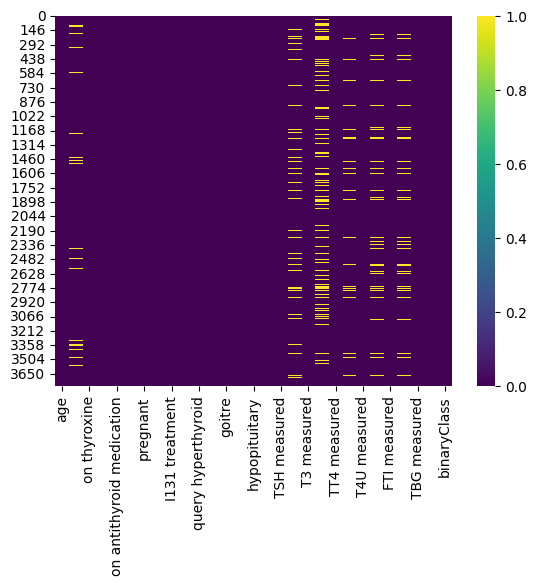

In [54]:
sns.heatmap(df.isna(),cmap="viridis")

In [56]:
df=df.replace({"F":1,"M":0})

In [ ]:
df.drop(columns=["TBG measured","referral source"], inplace=True)

In [62]:
cols = df.columns[df.dtypes.eq('object')]
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')
df.dtypes

age                          float64
sex                          float64
on thyroxine                   int64
query on thyroxine             int64
on antithyroid medication      int64
sick                           int64
pregnant                       int64
thyroid surgery                int64
I131 treatment                 int64
query hypothyroid              int64
query hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH measured                   int64
TSH                          float64
T3 measured                    int64
T3                           float64
TT4 measured                   int64
TT4                          float64
T4U measured                   int64
T4U                          float64
FTI measured                   int64
FTI                          float64
binaryClass                    int64
d

<Axes: >

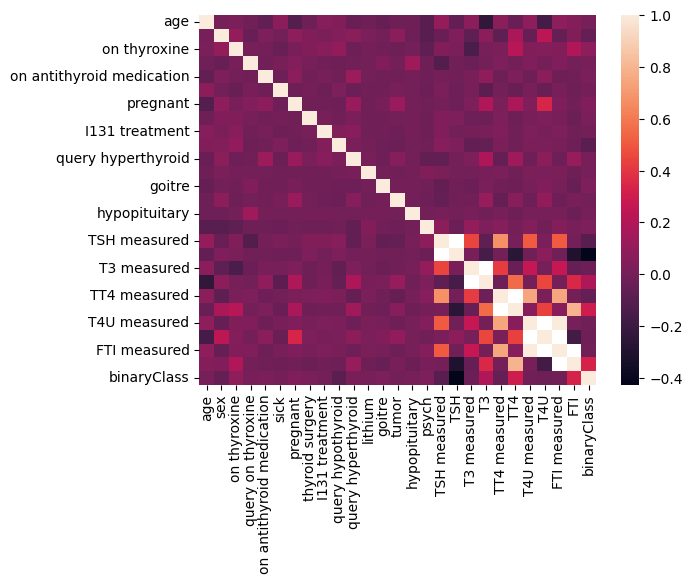

In [63]:
sns.heatmap(df.corr())

In [68]:
X= df[["age" , "sex" , "on thyroxine" , "TSH", "T3 measured", "T3" , "TT4"]]
y = df["binaryClass"]

In [72]:
X_train, X_test , y_train , y_test = train_test_split( X , y , test_size=0.2 , random_state=42)

In [74]:
mymodel = make_pipeline( SimpleImputer(), 
                        StandardScaler(),
                        LogisticRegression())
mymodel.fit(X_train , y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [76]:
y_predict = mymodel.predict(X_test)

In [77]:
accuracy = accuracy_score(y_test ,  y_predict)
accuracy

0.9576158940397351

In [78]:
import pickle

In [79]:
filename = 'Thyroid_model.sav'
pickle.dump(mymodel, open(filename, 'wb'))

In [80]:
# loading the saved model
loaded_model = pickle.load(open('Thyroid_model.sav', 'rb'))